###### Importing Python Librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.utils import resample
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

***

Read the appropriate dataframes to answer subsequent questions 

In [2]:
merged_df = pd.read_csv('merged_df.csv')
final_df = pd.read_csv('finaldf.csv')

In [3]:
# changing the apointment date type to the correct datetime type 

merged_df['appointment date']= pd.to_datetime(merged_df['appointment date'])

In [4]:
# changing the date columns type to the correct datetime type 

final_df['call date']= pd.to_datetime(final_df['call date'])
final_df['first_appointment_date']= pd.to_datetime(final_df['first_appointment_date'])
final_df['last_appointment_date']= pd.to_datetime(final_df['last_appointment_date'])

### QUESTIONS

##### Question 1: what percentages of "seen" (i.e. completed) appointments were in March for minors seen by psychatrists?

The answer to this question lies in the raw merged_df dataframe between triage data and appointment data, when a left join was conducted on the appointment data with the triage dataframe.

In [5]:
merged_df

,full name,name,surname,age,gender,call date,services awerness via,appointment date,status,practitioner,phq9
0,alexander scott,alexander,scott,44.0,male,2021-02-15,ngo,2021-03-10,attended,psychiatrist,21.0
1,alfie murray,alfie,murray,NaN,male,2021-02-15,twitter,2021-03-10,attended,psychiatrist,23.0
2,alfie murray,alfie,murray,NaN,male,2021-02-15,twitter,2021-03-22,attended,social worker,22.0
3,alice murray,alice,murray,NaN,female,2021-02-05,lifeline,2021-03-01,attended,nurse,NaN
4,alice murray,alice,murray,NaN,female,2021-02-05,lifeline,2021-03-28,attended,psychiatrist,23.0
...,...,...,...,...,...,...,...,...,...,...,...
85,lewis robertson,lewis,robertson,16.0,male,2021-02-13,NaN,2021-03-31,cancelled,psychiatrist,NaN
86,alfie murray,alfie,murray,NaN,male,2021-02-15,twitter,2021-03-31,cancelled,social worker,NaN
87,sophie lard,sophie,lard,8.0,female,2021-02-08,close entourage,2021-03-04,attended,nurse,23.0
88,sophie lard,sophie,lard,8.0,female,2021-02-08,close entourage,2021-03-16,attended,psychiatrist,NaN


It is important to mention that merged data contain paitents that attended once, and patient that attended multiple times, it is cautioned to rush and eliminate duplicates (in the risk of counting 2 times). However the specific question asks about minors who attented and with a psychiatrist: an example, Alfie attended 2 times: one time with a social worker and one time with a psychiatrist. It will be detrimental to have rushed and eliminated duplicates, as elicited in the example previsouly

In [6]:
# code filtering the merged dataframe to rows of minors only and whose appointment date was in March 
# then count the attended and cancelled values, finally divide by the total number of patients to find the percentage 

round(merged_df[(merged_df.age <18) & (merged_df['appointment date'].dt.month == 3) & 
                (merged_df.practitioner == 'psychiatrist')].status.value_counts()/90, 3) *100

attended     3.3
cancelled    1.1
Name: status, dtype: float64

Answer: 3.3 % of minors attended their appointments with psychiatrist 

***

##### Question 2: For patients who attended more than 1 session, what was the average percentage change in phq9 scores? is there a difference in percentages variation between patients who saw 1 type of practitioner and those who did not? 

To answer this question, previous data rearrangements were conducted on the merged_df dataframe to display only patients that have attended appointments more than once, furthermore displaying only their first and last visits and the corresponding practitioner and the date of the call, appointments.

###### Initial answer

In [7]:
average_perc_change = final_df['%_change'].mean()
round(average_perc_change,2)

242.9

Inital calculation of the average, Nevertheless the percentage change variable contains in its distribution substantial outliers values that skew the average. Further exploratory analysis should be conducted

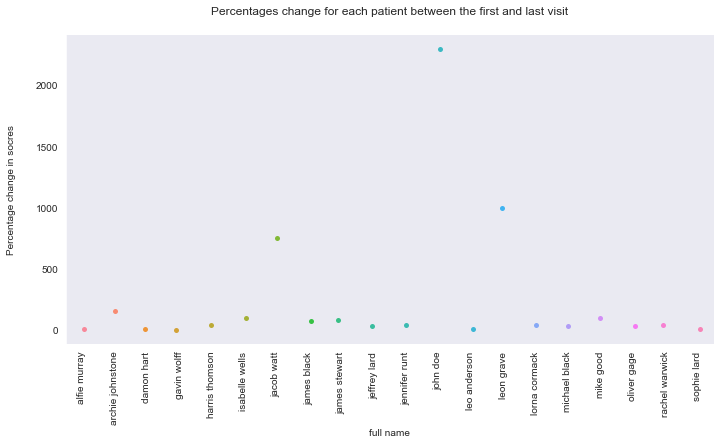

<Figure size 648x1080 with 0 Axes>

In [8]:
# categorical plot/point plot of precentages change for each patient 
sns.set_style("dark")
sns.catplot(x="full name", y="%_change", data=final_df, aspect= 2)
sns.color_palette('tab20_r')
plt.xticks(rotation=90)
plt.ylabel("Percentage change in socres", labelpad=20)
plt.title('Percentages change for each patient between the first and last visit',pad=20)
plt.figure(figsize=(9,15))
plt.show();

the mean is skewed due to the presence of strong outliers in the percentage change distribution, it is highly cautioned to replace outliers with the mean (computed without outliers), this will narrow the confidence interval of the distribution, producing a more unrealistic/ideal distribution. It is possible to use the median as a measure of center.
As observed in the percentage change point plot above, 3 outliers with high values, closer look to those values and the circumstances in which they were recorded, review of the scoring, and the initial data entry can be considered. 

In [9]:
np.median(final_df['%_change'].sort_values())

40.835

The median is almost 41%, can be considered the center of the percentage change distribution 

In [10]:
# mean without outliers 
final_df['%_change'][final_df['%_change']< 500].mean()

47.52352941176471

The mean of percentage change without outliers is 47%

***

##### Separating the samples of percentage change according to practitioners similarity and difference for each patient and checking Normality (highly improbable with the sample sizes at hand and the presence of outliers soiling the distribution)

In [11]:
same_pract_percentages = final_df[(final_df.firstVisit_practitioner == final_df.lastVisit_practitioner)]['%_change']

diff_pract_precentages = final_df[(final_df.firstVisit_practitioner != final_df.lastVisit_practitioner)
                                  & (final_df['%_change'] <2000)]['%_change']

In [12]:
same_pract_percentages

3        0.00
4       37.50
6      750.00
12       7.14
13    1000.00
16     100.00
Name: %_change, dtype: float64

In [13]:
same_pract_percentages[same_pract_percentages<500].mean()

36.16

In [14]:
diff_pract_precentages

0       4.35
1     157.14
2       9.52
5     100.00
7      74.07
8      83.33
9      33.33
10     40.00
14     41.67
15     35.71
17     33.33
18     42.11
19      8.70
Name: %_change, dtype: float64

In [15]:
diff_pract_precentages.mean()

51.02000000000001

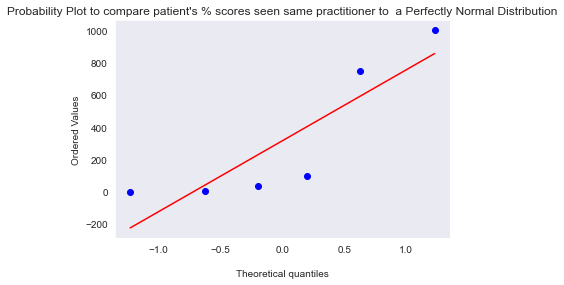

In [16]:
# Probability plot to visualize asses the normality of a distribution 
stats.probplot(same_pract_percentages, dist="norm", fit=True, plot=plt)
plt.xlabel("Theoretical quantiles", labelpad=15)
plt.title("Probability Plot to compare patient's % scores seen same practitioner to  a Perfectly Normal Distribution")
plt.show()

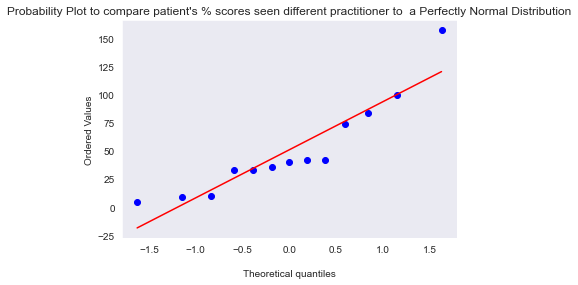

In [17]:
stats.probplot(diff_pract_precentages, dist="norm", fit=True, plot=plt)
plt.xlabel("Theoretical quantiles", labelpad=15)
plt.title("Probability Plot to compare patient's % scores seen different practitioner to  a Perfectly Normal Distribution")
plt.show()

It is obvious and more ascretained that small samples infected with outliers, are far from normally distributed. For that matter running a t-test to examine the sample means similarity or difference is risky and faulty under those circumstances, with heterogeneity of variances between samples and non normality. The situation is better suited to conduct bootstraping techniques on samples and generate a mean sampling distribution that will be the closest to the real mean (each sample's population mean). 

***

It was considered that high value percentage change above 500 will be removed, to minimize their infulence on sample statistics, taking in consideration also the small samples that severly violate every condition to be able to conduct inferential statitics

In [18]:
final_df =final_df[final_df['%_change'] <500]
final_df

,full name,age,gender,call date,services awerness via,first_appointment_date,firstVisit_practitioner,first_score,last_appointment_date,lastVisit_practitioner,last_score,%_change
0,alfie murray,NaN,male,2021-02-15,twitter,2021-03-10,psychiatrist,23.0,2021-03-22,social worker,22.0,4.35
1,archie johnstone,35.0,male,2021-02-25,radio,2021-03-13,psychiatrist,7.0,2021-03-28,psychologist,18.0,157.14
2,damon hart,76.0,male,2021-02-07,ngo,2021-03-07,social worker,21.0,2021-03-28,nurse,19.0,9.52
3,gavin wolff,8.0,male,2021-02-06,ngo,2021-03-01,psychologist,23.0,2021-03-31,psychologist,23.0,0.00
4,harris thomson,82.0,male,2021-02-13,lifeline,2021-03-09,nurse,16.0,2021-03-23,nurse,10.0,37.50
5,isabelle wells,25.0,female,2021-02-13,twitter,2021-03-03,psychologist,11.0,2021-03-30,psychiatrist,0.0,100.00
7,james black,37.0,male,2021-02-06,close entourage,2021-03-02,social worker,27.0,2021-03-04,psychologist,7.0,74.07
8,james stewart,41.0,male,2021-02-13,television,2021-03-08,psychiatrist,24.0,2021-03-31,psychologist,4.0,83.33
9,jeffrey lard,45.0,male,2021-02-07,close entourage,2021-03-04,social worker,27.0,2021-03-15,psychiatrist,18.0,33.33
10,jennifer runt,41.0,female,2021-02-08,instagram,2021-03-29,psychiatrist,15.0,2021-03-31,psychologist,21.0,40.00


***

Overcomming the issues facing the samples (small size, heteroscedacity, normality violation). the conditions are best suited to perform a bootstraping on samples: perform a sampling distribution on the mean statistic
(i.e. sample with replacement from each sample, and record the mean of that sample: around 10000 iterations)

##### Bootstraping and Sampling Distribution 

Would you like to perform a conditioned sampling distribution on practictioner type-y- or full sampling distribution?-n- y
please enter (same) or (different) to filter according to practitioner type assigned to patient? same


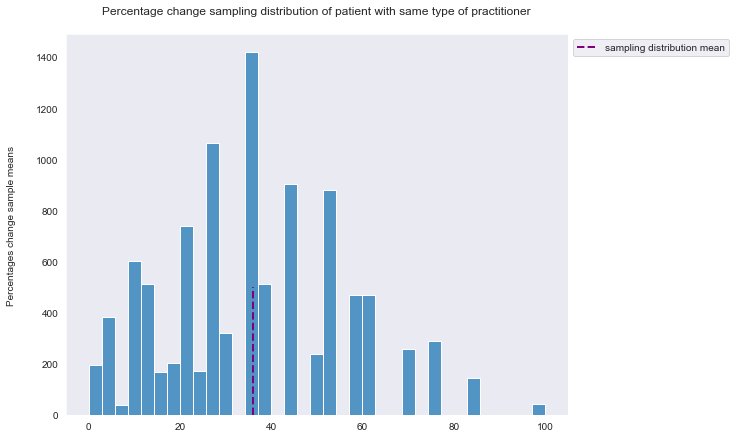

It is with 95% confidence that the mean of percentages change for a sample of same practitioners: 36.08 is between 35.7 and 36.47


In [22]:
""" Class with data attribute: dataframe, column in question: percentage change"""

class SamplingDistribution:
    
    def __init__(self, df, col):
        self.dataframe = df
        self.colname = col




""" predefined function that will take as an argument the class object"""
        
def bootstrap(obj):
    
    """ first condition that promtp the user to a y or n answer for the sampling distribution"""
    condition1= True
    while condition1:
        try:
            a= input('Would you like to perform a conditioned sampling distribution on practictioner type-y- or full sampling distribution?-n- ')
                
            if a.lower().strip() not in ['y', 'n']:
                raise ValueError
                    
        except(TypeError, ValueError):
            print('Oops! Error, kindly enter y or n to filter according to practioner type i.e. same or diff')
            continue
            
        condition1= False
            
    """ if n is chosen a full sampling distribution will conducted by bootstraping from the sample and 
    collecting each sample mean into a list and will return that list and the initial condition chosen 'n'
    in a tupe"""
    
    if a == 'n':
        np.random.seed(123)
        sample_means =[]
        for i in range(0,10001):
            sample_n = resample(obj.dataframe[obj.colname], n_samples= len(obj.dataframe))
            sample_means.append(sample_n.mean())
            
        return sample_means, a
        
    """ if y is chosen the user will be promted again on which sample to chose: same practitioner or different"""
    
    if a == 'y':
        condition2 = True
        while condition2:
            try:
                b = input("please enter (same) or (different) to filter according to practitioner type assigned to patient? ")
                    
                if b.lower() not in ['same', 'different']:
                    raise ValueError                    
            
            except(TypeError, ValueError):
                print('Oops! Error, Enter (same) or (different) to filter or not according to practioner type ')
                continue 
                    
            condition2= False
                
            """ if 'same' is chosen a filtering condition is assigned to filter accordginly percentage changes 
            and conduct the sampling and collect the sample means into a list and return that list.
            the similar function is used for 'different' but another filtering condition is createdm both algorithms
            return the sample means list and the condition it was created with: 'same' or 'different' """
            
            if b =='same':
                np.random.seed(123)
                sample_means =[]
                filter_condition = obj.dataframe.firstVisit_practitioner == obj.dataframe.lastVisit_practitioner
                    
                for i in range(0,10001):
                    sample_n = resample(obj.dataframe[obj.colname][filter_condition], 
                                        n_samples= len(obj.dataframe[filter_condition]))
                        
                    sample_means.append(sample_n.mean())
                    
                return sample_means, b
                

            if b =='different':
                np.random.seed(123)
                sample_means =[]
                filter_condition = obj.dataframe.firstVisit_practitioner != obj.dataframe.lastVisit_practitioner
                    
                for i in range(0,10001):
                    sample_n = resample(obj.dataframe[obj.colname][filter_condition], 
                                        n_samples= len(obj.dataframe[filter_condition]))
                        
                    sample_means.append(sample_n.mean())
                    
                return sample_means, b
                    


def Confidence_Intervals(x):
    
    """ confidence interval function that will take as an argument the return value-means sample list from the
    bootstrap function and the condition that list was created with 
    and return the confidence interval of the means with a 95% level of confidence
    along with the mean and std deviation of that sample mean"""
    
    mean, sigma = np.mean(x[0]), np.std(x[0],ddof=1)
    conf_int_= stats.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(len(x[0])))
    if x[1] == 'n':
        return f"It is with 95% confidence that the mean of percentages change: {round(mean,2)} is between {round(conf_int_[0],2)} and {round(conf_int_[1],2)}", mean, sigma

    
    if x[1] == 'same':
        return f"It is with 95% confidence that the mean of percentages change for a sample of same practitioners: {round(mean,2)} is between {round(conf_int_[0],2)} and {round(conf_int_[1],2)}", mean, sigma

    
    if x[1] == 'different':
        return f"It is with 95% confidence that the mean of percentages change for a sample of different practitioners:: {round(mean,2)} is between {round(conf_int_[0],2)} and {round(conf_int_[1],2)}", mean, sigma

    

def Visualize_Distribution(z,y):
    
    """ this function takes as argument the return values of its predecessor functions:
    bootstrap and confidence interval, their tuples return values are injected in the function Visualize_distribution
    and will plot the distribution plot of the distribution of means and its mean
"""
    
    if z[1] == 'n':
        plt.figure(figsize=(9,7))
        _ = sns.histplot(data=z[0])
        plt.title("Percentage change sampling distribution", pad=20)
        plt.ylabel('Percentages change sample means',labelpad=20)
        plt.vlines(x=[round(y[1],2)], ymin=0, ymax=500, 
                   colors='purple', ls='--', lw=2, label='sampling distribution mean')
        # place legend outside
        plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
        plt.show();
        
    if z[1] == 'same':
        plt.figure(figsize=(9,7))
        _ = sns.histplot(data=z[0])
        plt.title("Percentage change sampling distribution of patient with same type of practitioner", pad=20)
        plt.ylabel('Percentages change sample means',labelpad=20)
        plt.vlines(x=[round(y[1],2)], ymin=0, ymax=500, 
                   colors='purple', ls='--', lw=2, label='sampling distribution mean')
        # place legend outside
        plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
        plt.show();
        
    if z[1] == 'different':
        plt.figure(figsize=(9,7))
        _ = sns.histplot(data=z[0])
        plt.title("Percentage change sampling distribution of patient with different type of practitioner", pad=20)
        plt.ylabel('Percentages change sample means',labelpad=20)
        plt.vlines(x=[round(y[1],2)], ymin=0, ymax=500, 
                   colors='purple', ls='--', lw=2, label='sampling distribution mean')
        # place legend outside
        plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
        plt.show();

        
        

def main():
    smpl = SamplingDistribution(final_df, '%_change')
    boot = bootstrap(smpl)
    conf = Confidence_Intervals(boot)
    Visualize_Distribution(boot, conf)
    print(conf[0])
    
if __name__ == "__main__":
    
    main()

It is clear that the sampling distribution's means of the same and different practitioner samples are quite different, their confidence intervals do not overlap which leads to the definition, that the difference between means of patient that saw the same practitioners and those who did not, is statistically significant. 

***

##### Question 3: Among those patients who attended more than one session in March, compute the proportion of males to females 

To answer this question: final_df is the suitable created dataframe of patients that attended more than one appointment.

In [20]:
# reading again final_df (because previously we had eliminated percentage change outliers-value above 500)
# changing the date columns type to the correct datetime type 
final_df = pd.read_csv('finaldf.csv')
final_df['call date']= pd.to_datetime(final_df['call date'])
final_df['first_appointment_date']= pd.to_datetime(final_df['first_appointment_date'])
final_df['last_appointment_date']= pd.to_datetime(final_df['last_appointment_date'])

In [21]:
final_df.head()

,full name,age,gender,call date,services awerness via,first_appointment_date,firstVisit_practitioner,first_score,last_appointment_date,lastVisit_practitioner,last_score,%_change
0,alfie murray,NaN,male,2021-02-15,twitter,2021-03-10,psychiatrist,23.0,2021-03-22,social worker,22.0,4.35
1,archie johnstone,35.0,male,2021-02-25,radio,2021-03-13,psychiatrist,7.0,2021-03-28,psychologist,18.0,157.14
2,damon hart,76.0,male,2021-02-07,ngo,2021-03-07,social worker,21.0,2021-03-28,nurse,19.0,9.52
3,gavin wolff,8.0,male,2021-02-06,ngo,2021-03-01,psychologist,23.0,2021-03-31,psychologist,23.0,0.00
4,harris thomson,82.0,male,2021-02-13,lifeline,2021-03-09,nurse,16.0,2021-03-23,nurse,10.0,37.50


In [22]:
final_df.gender.value_counts()

male      15
female     5
Name: gender, dtype: int64

###### with the regards to the question formulation (males to females): it is understood that a ratio computation is required, Nevertheless, both ratio and proportions will be computed

Ratio of males to females in the distribution

the answer is 3:1. meaning for every 3 males there is 1 female 

***

proportion of males and  proportion of females in the distribution 

males ->  15:20 -> 3:4, thus 3 in every 4 patients who attended more than once appointments are males 

females -> 5:20 -> 1:4, thus 1 in every 4 patients who attended more than once appointments are females  